In this notebook I have tried to replicate the example given on http://machinelearningmastery.com/time-series-prediction-with-deep-learning-in-python-with-keras/. This to have a look how it difficult or easy it would be to incorporate time series forecasting functionality in mcfly.

This example shows forecasting one timestamp in the future, if we want to forecast further we need to use the forecasted timestep to forecast the next step, and then iteratively forecast further down in the future.

Download data from: https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/international-airline-passengers.csv

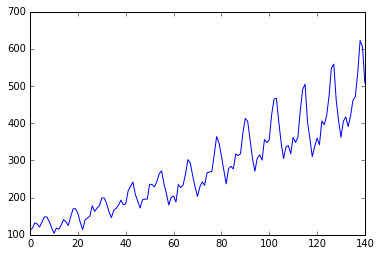

In [1]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('/media/windows-share/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using Theano backend.


In [3]:
# fix random seed for reproducibility 
numpy.random.seed(7)

In [4]:
# load the dataset
dataframe = pandas.read_csv('/media/windows-share/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

In [5]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

94 47


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
model = Sequential()
look_back = 1
model.add(Dense(8, input_dim=look_back,activation='relu')) #init='normal',
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=20, verbose=False)

In [9]:
#def baseline_model():
#    # create and fit Multilayer Perceptron model
#    model = Sequential()
#    look_back = 1
#    model.add(Dense(8, input_dim=look_back,activation='relu')) #init='normal',
#    model.add(Dense(1))
#    model.compile(loss='mean_squared_error', optimizer='adam')
#    #model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=False)
#    return model

In [10]:
## fix random seed for reproducibility
#seed = 7
#numpy.random.seed(seed)
## evaluate model with standardized dataset
#estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=200, batch_size=5, verbose=0)

In [11]:
#kfold = KFold(n=len(trainX), n_folds=10, random_state=seed)
#results = cross_val_score(estimator, trainX, trainY, cv=kfold)
#print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [12]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: ', testScore)

Train Score:  505.155981976
Test Score:  2053.46815864


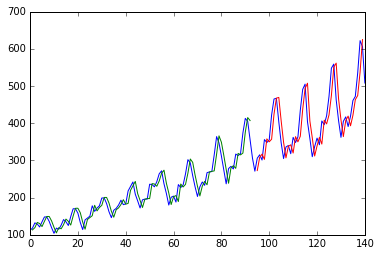

In [13]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
 
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
 
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
 
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# Average error on training data
trainScore ** 0.5

In [ ]:
# Average error on training data
testScore ** 0.5

In [ ]:
trainPredict.shape

In [ ]:
trainX.shape

In [ ]:
trainY.shape